# Airbnb New York 🌃

[![Airbnb](https://tentulogo.com/wp-content/uploads/airbnb-logo-1.png)](https://postimg.cc/Mnqzrk1W)

#### **About dataset 📄**


This dataset show the different properties in the Airbnb app in New York city, USA.

---

#### About columns 🔍:

* NAME: Description.
* host_identity_verifed: Verfied by Airbnb
* host_name: The person presenting the property
* neighbourhood group : Boroughs
* neighbourhood: Neighbourhood of the borough
* lat: Latitude
* long: Longitude
* instant_bookable: Wheter you can book inmediately
* cancellation_policy: Kind of cancelalation policy
* room_type: Kind of property
* Construction year: In which year it was built?
* Price: Rental price 
* service_fee: Airbnb profit
* Minimum nights: Minimum amount of stay
* Number of reviews: How many people have qualified the property?
* last review: Last time that has been qualified.
* reviews per month: Average number of reviews per month.
* review rate: Total average of reviews.
* calculated host listings count: Amount of guests.
* availability 365: number of days the property is available in the year.
* house rules: Rules for the guests

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Extract dataset
df_airbnb = pd.read_csv('/work/Airbnbdata/Airbnb_dataset/Airbnb_Open_Data.csv', header=0, sep=',')
df_airbnb.head()

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


---

## Cleaning data 🗑

In [3]:
#In which columns there are null-data?
df_airbnb.isnull().any()

id                                False
NAME                               True
host id                           False
host_identity_verified             True
host name                          True
neighbourhood group                True
neighbourhood                      True
lat                                True
long                               True
country                            True
country code                       True
instant_bookable                   True
cancellation_policy                True
room type                         False
Construction year                  True
price                              True
service fee                        True
minimum nights                     True
number of reviews                  True
last review                        True
reviews per month                  True
review rate number                 True
calculated host listings count     True
availability 365                   True
house_rules                        True


In [4]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
"""
License only has two non-null, so it's irrelevant.
"""
df_airbnb.drop(['license'], axis=1, inplace=True)

In [6]:
"""
This dataset is about New York Airbnb, so all values of country and country code
should be United States and US respectively.
"""
df_airbnb.country.fillna('United States', inplace=True)
df_airbnb['country code'].fillna('US', inplace=True)

In [7]:
"""
Null data in house_rules column
"""
total_data = df_airbnb.shape[0]
null_data = df_airbnb[df_airbnb.house_rules.isnull()].shape[0]
percentage = np.round(null_data / total_data, 4) * 100
print('More than {}% of data in house_rules is null-data'.format(percentage))

More than 50.81% of data in house_rules is null-data


In [8]:
"""
Remove house_rules columns of dataset, but I'll assign it in a variable for 
further analysis.
"""
house_rules = df_airbnb.house_rules[df_airbnb.house_rules.notnull()]
df_airbnb.drop(['house_rules'], axis=1, inplace=True)

In [9]:
"""
There are certain columns with null-data, so I'll apply dropna. 
"""
df_airbnb.dropna(inplace=True)

In [10]:
df_airbnb.drop(['id', 'host id'], axis=1, inplace=True) #Unuseful columns

def cast_int(x):
    return int(x.replace('$', '').replace(',', '').strip())

df_airbnb.price = df_airbnb.price.apply(cast_int)
df_airbnb['service fee'] = df_airbnb['service fee'].apply(cast_int)
df_airbnb.loc[:, ['price', 'service fee']].dtypes

price          int64
service fee    int64
dtype: object

In [11]:
df_airbnb.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'country', 'country code',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [12]:
#Change label columns
df_airbnb.rename(columns={'host_identity_verified': 'host_verified', 'neighbourhood group':  'Boroughs',
'room type': 'room_type', 'Construction year': 'year_built', 'service fee': 'service_fee',
'minimum nights': 'min_nights', 'number of reviwes': '#reviews', 'last review': 'last_review',
'number of reviews': '#reviews','reviews per month': 'reviews_month', 'review rate number': 'review_rate', 
'calculated host listings count': '#guests', 'availability 365': 'availability_365'}, inplace=True)

---

## Analysis - Airbnb New York👀

### Room type 🏠

#### The most common one

In [13]:
#My colors
c_1 = sns.color_palette('coolwarm')[-1]
c_2 = sns.color_palette('bone')[-2]
palette = sns.color_palette('Set2')[:4]
#My palette
my_pltt = {x: c_2 for x in df_airbnb['room_type'].unique()}
my_pltt['Entire home/apt'] = c_1

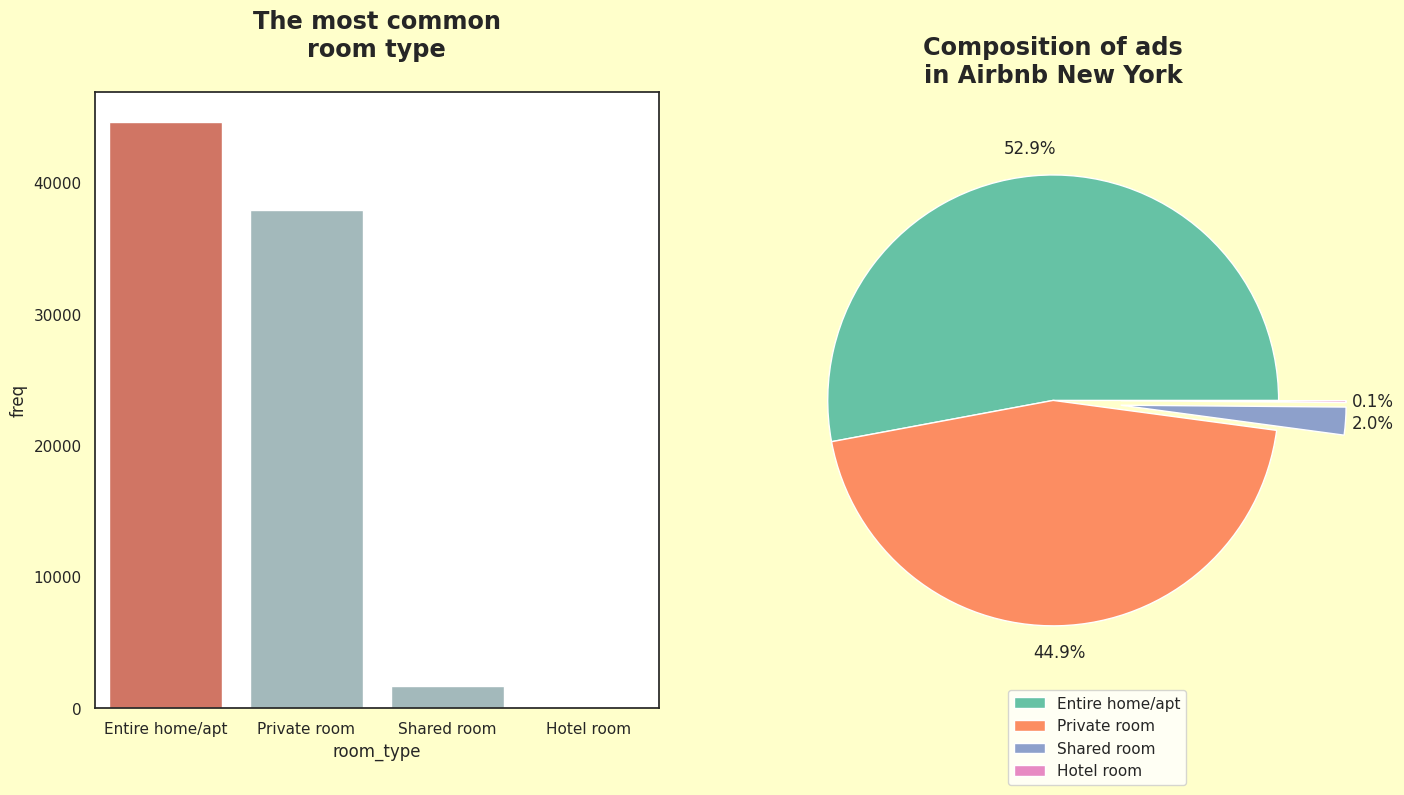

In [14]:
frequency = df_airbnb.room_type.value_counts()
df_room_type = pd.DataFrame(frequency)
df_room_type.rename(columns={'room_type': 'freq'}, inplace=True)

explode = [0, 0, 0.3, 0.3]
#Canvas
sns.set_theme(style='white')
fig = plt.figure(figsize=(16, 8))
#Barplot
ax1 = fig.add_subplot(121)
ax1 = sns.barplot(data=df_room_type, x=df_room_type.index, y='freq',palette=my_pltt)
ax1.set_title('The most common\nroom type\n', fontdict={'size': 'x-large','weight': 'bold'})
ax1.set_xlabel('room_type')
#Pie chart
ax2 = fig.add_subplot(122)
ax2.pie(data=df_room_type, x='freq', autopct='%.01f%%', pctdistance=1.12, explode=explode, colors=palette)
ax2.legend(labels=df_room_type.index, bbox_to_anchor=(0.75, 0))
ax2.set_title('Composition of ads\nin Airbnb New York\n', fontdict={'size': 'x-large', 'weight': 'bold'})
fig.set_facecolor('#FFFFCB')
fig.show()

 It can be seen that Entire homes/apt and Private rooms represent more than 90% of Airbnb ads in New York, so they're the most common. On another hand, what is less offered are the Shared and Hotel rooms, since they represent only the 2.1% of ads.

---

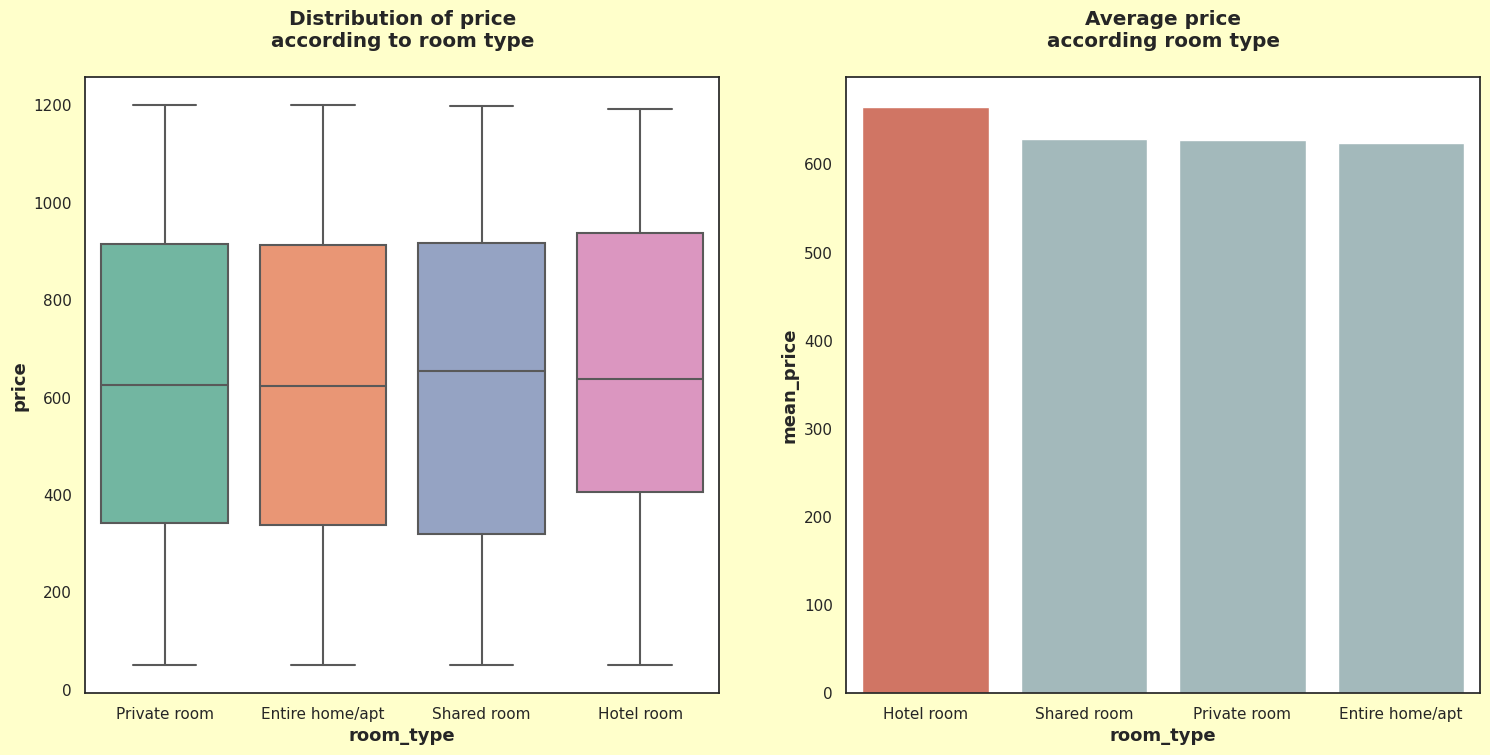

In [15]:
df_mean_price = df_airbnb.pivot_table(index='room_type', aggfunc={'price': 'mean'})
df_mean_price.sort_values('price', ascending=False, inplace=True)
df_mean_price.rename(columns={'price': 'mean_price'}, inplace=True)
df_mean_price.mean_price = df_mean_price.mean_price.apply(lambda x: np.round(x,2))

#Palette
my_pltt['Entire home/apt'] = c_2
my_pltt['Hotel room'] = c_1
#Canvas
fig = plt.figure(figsize=(18, 8))
#Boxplot
ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(data=df_airbnb, x='room_type', y='price', palette='Set2')
ax1.set_title('Distribution of price\naccording to room type\n', fontdict={'size': 'large', 'weight': 'bold'})
plt.xticks(fontsize=11), plt.yticks(fontsize=11)
ax1.set_xlabel('room_type', weight='bold', fontsize=13), ax1.set_ylabel('price',weight='bold', fontsize=13)
#Barplot
ax2 = fig.add_subplot(122)
ax2 = sns.barplot(data=df_mean_price, x=df_mean_price.index, y='mean_price', palette=my_pltt)
ax2.set_title('Average price\naccording room type\n', fontdict={'size': 'large', 'weight': 'bold'})
plt.xticks(fontsize=11), plt.yticks(fontsize=11)
ax2.set_xlabel('room_type', weight='bold', fontsize=13), ax2.set_ylabel('mean_price',weight='bold', fontsize=13)
fig.set_facecolor('#FFFFCB')
fig.show()

In [16]:
df_mean_price

,mean_price
room_type,
Hotel room,665.56
Shared room,629.09
Private room,627.79
Entire home/apt,624.35


The abscense of outliers in the distribution of price of each room type allows us to know that the average of each of them is not being affected, so it can be used to answer the following:
* Which is the room type with the most average price?
    In barplot it can be evidenced that the Hotel room is the one that has the highest average price with an amount of $665.56


---

### Correlation between Price vs Service fee🔎

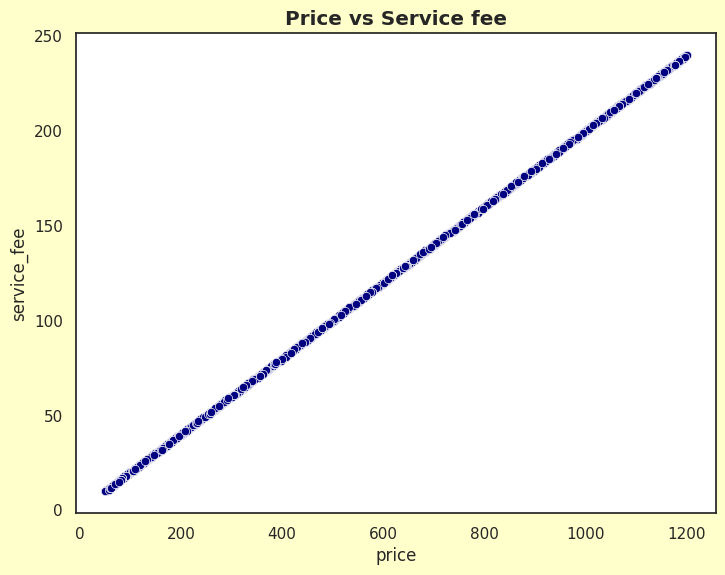

In [17]:
#Canvas
sns.set_theme(style='white')
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1, 1])
#Graphic
ax = sns.scatterplot(data=df_airbnb, x='price', y='service_fee', color='#000080')
ax.set_title('Price vs Service fee', fontdict={'size': 'large', 'weight': 'bold'})
fig.set_facecolor('#FFFFCB')
fig.show()

The service fee is the profit that Airbnb receives after a successful rental. And the graph shows that the higher the price of property, greater profits for the company, which is a very congruent direct correlation

---

### Verified and univerified hosts ✅

My Hypothesis: Verified hosts have the best average reviews and are the ones that have had the most guests compared to univerified hosts. 

Justification: I consider that being verified Airbnb users are very reliable people and they have been there a long time.

#### Checking hipothesis...🔬

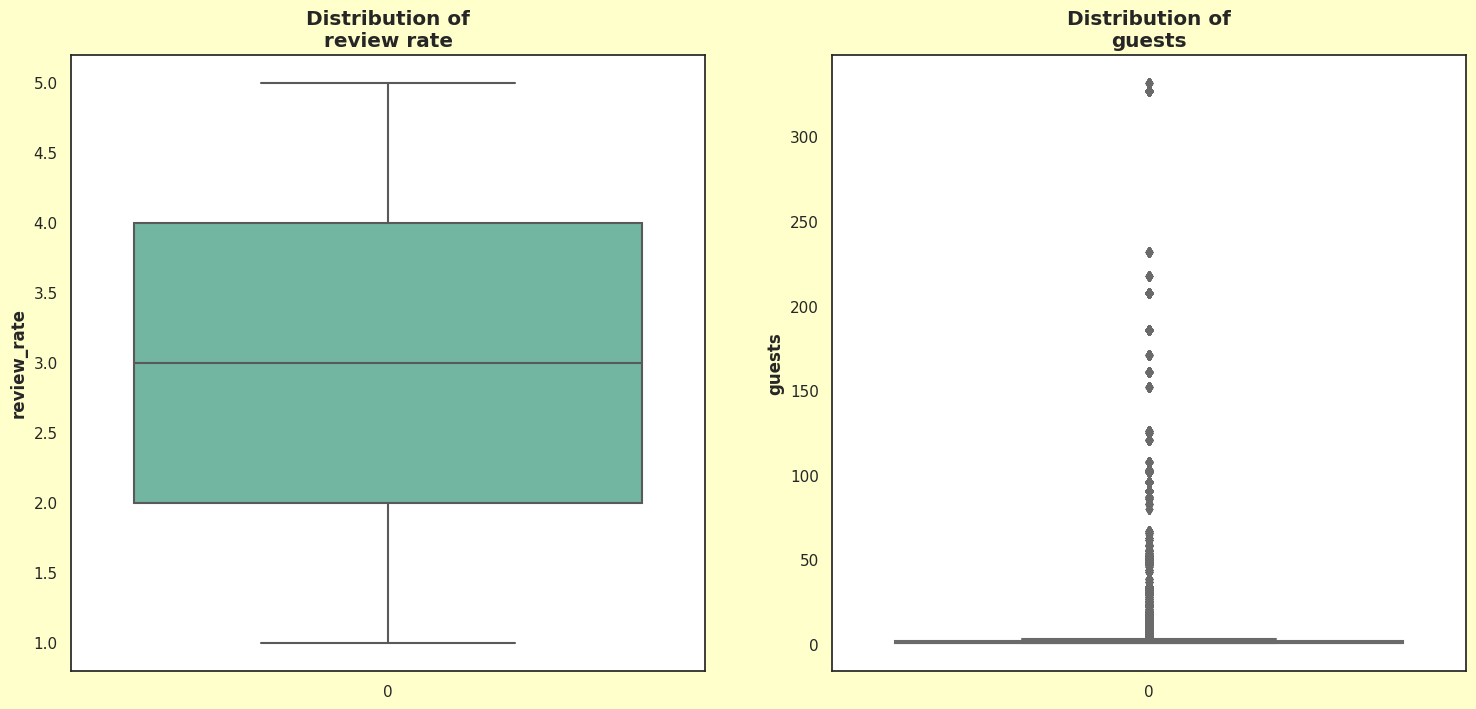

In [18]:
#Canvas
sns.set_theme(style='white')
fig = plt.figure(figsize=(18, 8))
#Box1
ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(data=df_airbnb.review_rate, palette='Set2')
ax1.set_ylabel('review_rate', weight='bold', size=12)
ax1.set_title('Distribution of\nreview rate', fontdict={'size': 'large', 'weight': 'bold'})
#Box2
ax2 = fig.add_subplot(122)
ax2 = sns.boxplot(data=df_airbnb['#guests'], palette='Set3')
ax2.set_title('Distribution of\nguests', fontdict={'size': 'large', 'weight': 'bold'})
ax2.set_ylabel('guests', weight='bold', size=12)

fig.set_facecolor('#FFFFCB')
fig.show()

The distribution of the average reviews is not biased, so the arithmetic mean can be used as metric in order to know wheter verified hosts are better rated than unconfirmed ones.

On the other hand, the distribution of guests has too many outliers, so the most convinient could be to discard them so as to focus on the most consistent data.

#### Review rate 📊

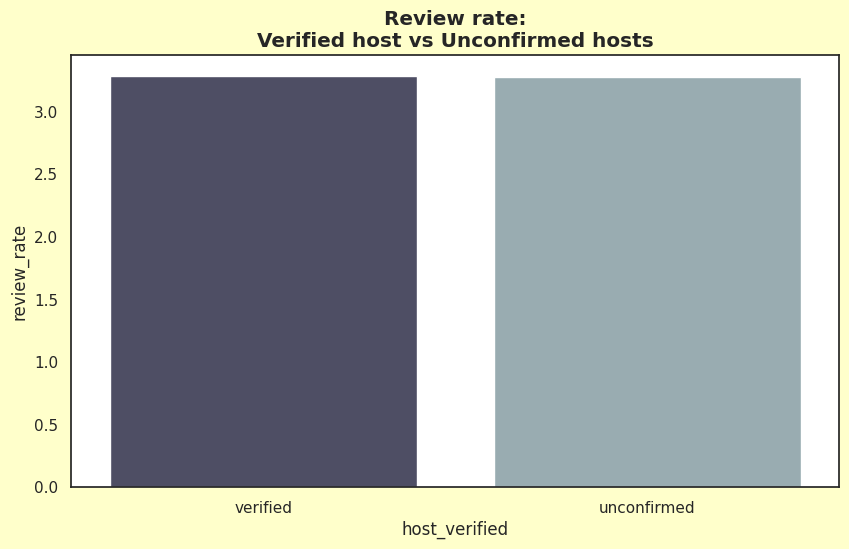

In [19]:
df_review = df_airbnb.groupby('host_verified').agg({'review_rate': 'mean'}).sort_values('review_rate', ascending=False)
df_review['review_rate'] = df_review.review_rate.apply(lambda x: np.round(x, 4))

#Canvas
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1.2, 0.9])
#Barplot
ax = sns.barplot(data=df_review, x=df_review.index, y='review_rate', palette='bone')
ax.set_title('Review rate:\nVerified host vs Unconfirmed hosts', fontdict={'size': 'large', 'weight': 'bold'})
fig.set_facecolor('#FFFFCB')
fig.show()

The difference in the review rate between the verified and unconfirmed hosts is minimal, but it's confirmed that the first ones are the best rated by the guests.

---

#### Number of guests 🏡

In [20]:
#Finding out outliers
q_3 = np.percentile(df_airbnb['#guests'], 75)
q_1 = np.percentile(df_airbnb['#guests'], 25)
iqr = q_3 - q_1
outlier = q_3 + (1.5 * iqr)
#Df without outliers
guests_1 = df_airbnb[df_airbnb['#guests'] < outlier]
df_guests = guests_1.groupby('host_verified').agg({'#guests': ['sum', 'mean']})

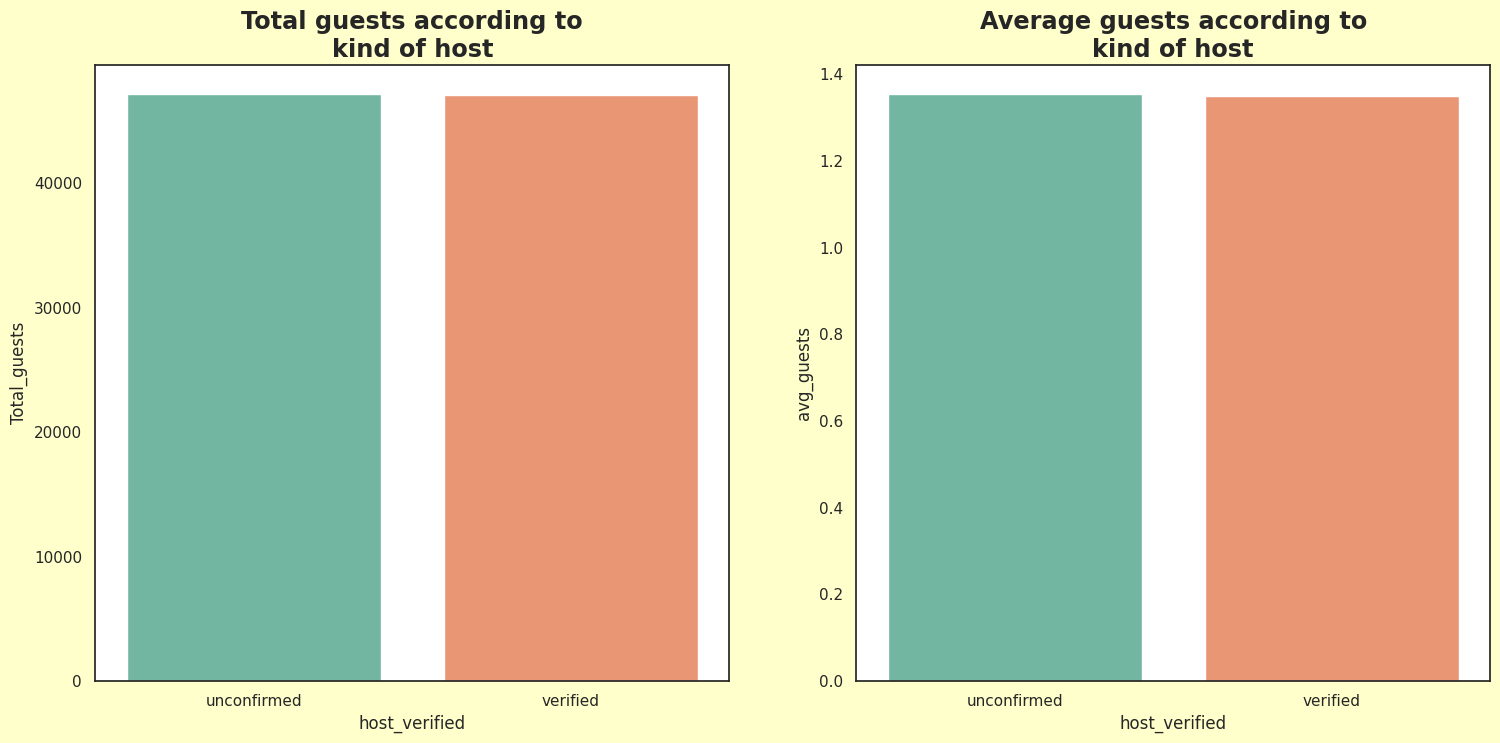

In [21]:
#Canvas
fig = plt.figure(figsize=(18, 8))
#Total guests
ax1 = fig.add_subplot(121)
ax1 = sns.barplot(x=df_guests.index, y=df_guests.iloc[:, 0], palette='Set2')
ax1.set_title('Total guests according to\nkind of host', fontdict={'size': 'x-large', 'weight': 'bold'})
ax1.set_ylabel('Total_guests')

#Avg guests
ax2 = fig.add_subplot(122)
ax2 = sns.barplot(x=df_guests.index, y=df_guests.iloc[:, 1], palette='Set2')
ax2.set_title('Average guests according to\nkind of host', fontdict={'size': 'x-large', 'weight': 'bold'})
ax2.set_ylabel('avg_guests')

fig.set_facecolor('#FFFFCB')
fig.show()

In [22]:
df_guests.iloc[:, 1] = df_guests.iloc[:, 1].apply(lambda x: np.round(x, 4))
df_guests

#guests        
                   sum    mean
host_verified                 
unconfirmed    47125.0  1.3537
verified       47065.0  1.3507

In [23]:
total = df_airbnb.shape[0]
no_outlier = guests_1.shape[0]
percentage = np.round((no_outlier / total) * 100, 2)
print("After having removed the outliers, we've kept 82.62% of the data".format(percentage))

After having removed the outliers, we've kept 82.62% of the data


82.62% of the data tell us that the unconfirmed hosts are the ones with the most guests and the highest average of them compared to verified hosts. Therefore, the hypothesis is not met.

---

### The borough with the best review rate ⭐

In New York there are 5 boroughs: Brooklyn, Manhattan, Queens, Bronx and Staten Island, but in the column appears one more with the name 'brookln'. As it's very similar to Brooklyn, I suppose that refers the same borough.

In [24]:
df_airbnb.Boroughs.unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'Queens', 'Bronx',
       'Staten Island'], dtype=object)

In [25]:
df_airbnb.loc[df_airbnb.Boroughs == 'brookln', ['Boroughs']] = 'Brooklyn'
df_airbnb.Boroughs.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

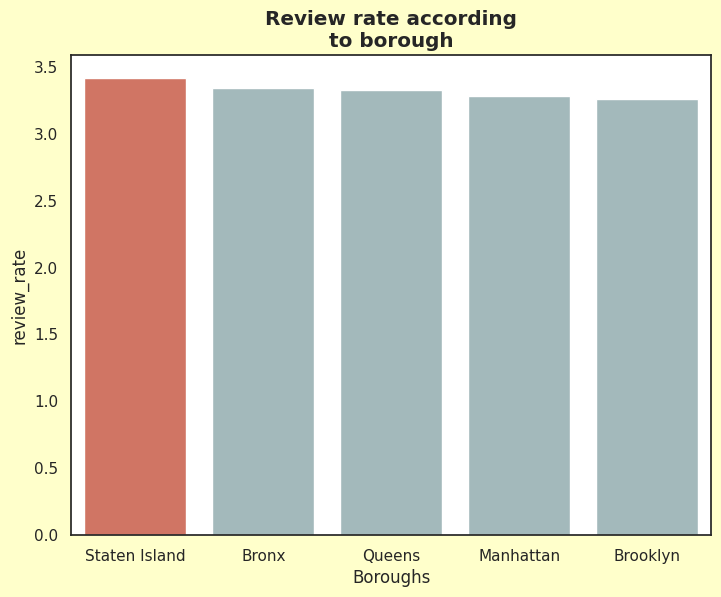

In [26]:
#Matrix whose variable is the review rate and the elements are the boroughs.
review_borough = df_airbnb.groupby('Boroughs').agg({'review_rate': 'mean'})
review_borough.sort_values('review_rate', ascending=False, inplace=True)

#Palette
my_pltt2 = {x:c_2 for x in df_airbnb.Boroughs.unique()}
my_pltt2['Staten Island'] = c_1
#Canvas
sns.set_theme(style='white')
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1, 1])
#Barplot
ax = sns.barplot(data=review_borough, x=review_borough.index, y='review_rate', palette=my_pltt2)
ax.set_title('Review rate according\nto borough', fontdict={'size': 'large', 'weight': 'bold'})

fig.set_facecolor('#FFFFCB')
fig.show()

In [27]:
review_borough

,review_rate
Boroughs,
Staten Island,3.413752
Bronx,3.341739
Queens,3.327936
Manhattan,3.276710
Brooklyn,3.260845


Staten Island is the highest rated borough in New York

---

### Minimum nights🌚

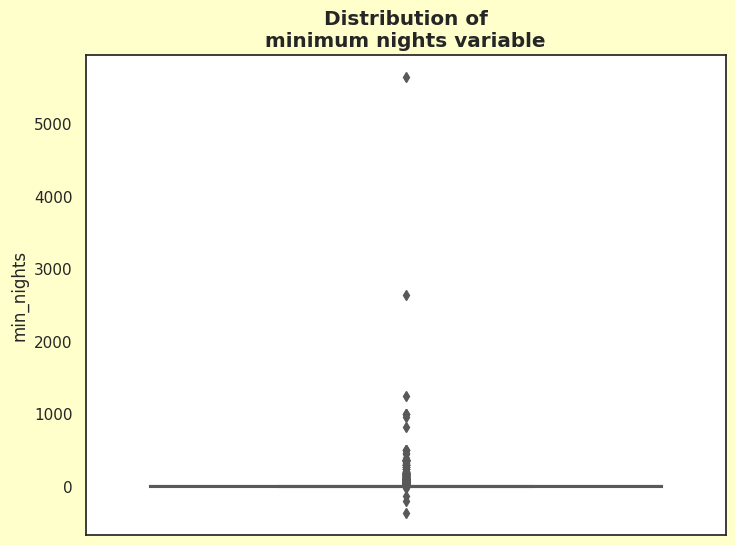

In [28]:
#There are a lot of outliers in the min_nights column

#Canvas
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1, 1])
#Boxplot
ax = sns.boxplot(data=df_airbnb, y='min_nights', palette='Set2')
ax.set_title('Distribution of\nminimum nights variable', fontdict={'size': 'large', 'weight': 'bold'})
ax.set_ylabel('min_nights')

fig.set_facecolor('#FFFFCB')
fig.show()

In [29]:
# There are data less than 0 and very large quantites, so I've to delete them.
df_airbnb.min_nights.describe()

count    84313.000000
mean         7.428665
std         27.986974
min       -365.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       5645.000000
Name: min_nights, dtype: float64

In [30]:
q_75 = np.percentile(df_airbnb.min_nights, 75)
q_25 = np.percentile(df_airbnb.min_nights, 25)
iqr = q_75 - q_25
outlier = q_75 + (1.5*iqr)

#Clean data
df_min_nights = df_airbnb.copy()
cond_1, cond_2 = df_min_nights.min_nights > 0, df_min_nights.min_nights < outlier
df_min_nights = df_min_nights[cond_1 & cond_2]

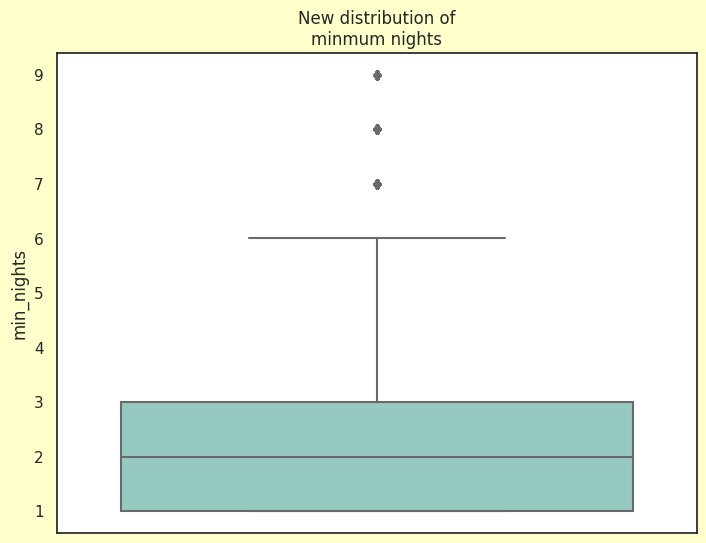

In [31]:
#Canvas
sns.set_theme(style='white')
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1, 1])
#Boxplot
ax = sns.boxplot(data=df_min_nights, y='min_nights', palette='Set3')
ax.set_title('New distribution of\nminmum nights')
fig.set_facecolor('#FFFFCB')
fig.show()

In [32]:
df_min_nights.min_nights.describe()

count    70488.000000
mean         2.583461
std          1.618664
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: min_nights, dtype: float64

There are still outliers, so I've to delete theme in order to it can seen the most consistent result

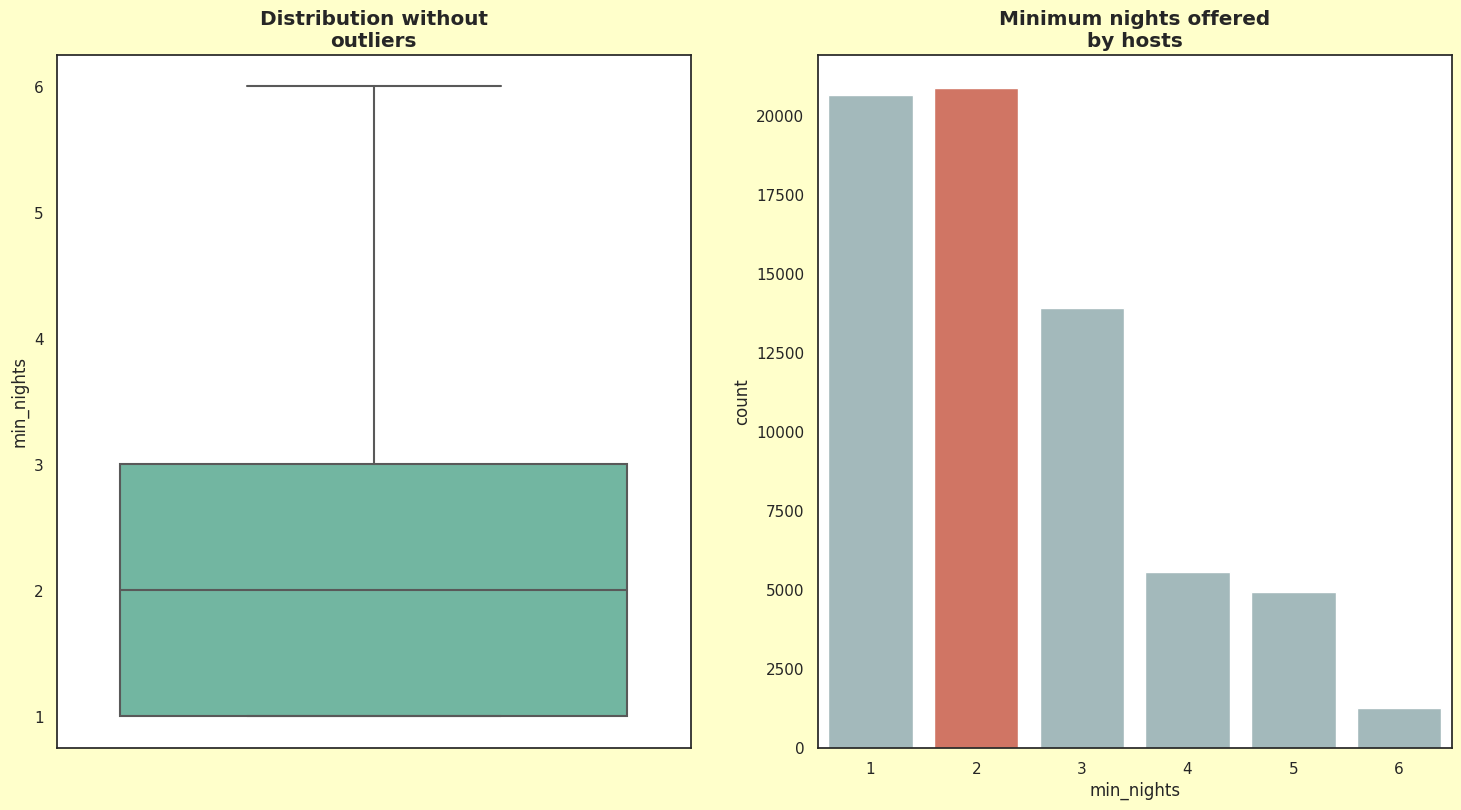

In [33]:
#Remove outliers
df_min_nights = df_min_nights[df_min_nights.min_nights <= 6]
df_min_nights.min_nights = list(map(int, df_min_nights.min_nights))

#Palette
my_pltt3 = {x: c_2 for x in df_min_nights.min_nights.unique()}
my_pltt3[2] = c_1
#Canvas
sns.set_style(style='white')
fig = plt.figure(figsize=(18, 9))
#Boxplot
ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(data=df_min_nights, y='min_nights', palette='Set2')
ax1.set_title('Distribution without\noutliers', fontdict={'size': 'large', 'weight':'bold'})
#Countplot
ax2 = fig.add_subplot(122)
ax2 = sns.countplot(data=df_min_nights, x='min_nights', palette=my_pltt3)
ax2.set_title('Minimum nights offered\nby hosts', fontdict={'size': 'large', 'weight': 'bold'})

fig.set_facecolor('#FFFFCB')
fig.show()

After removing all outliers from the min_nights column, it can be seen that the most common is that the hosts offer at least 2 nights in the property

---

### Availability - 365 

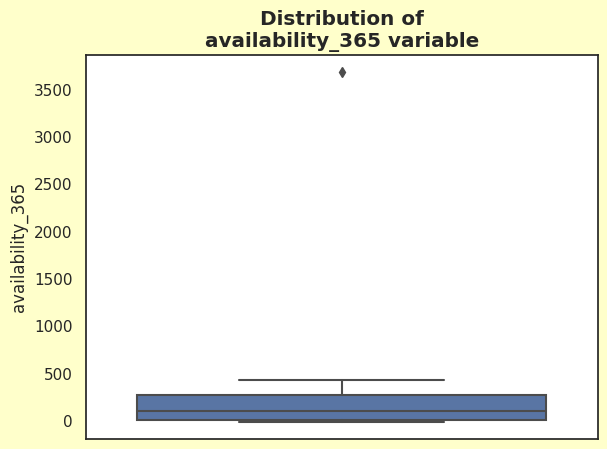

In [34]:
#Check if there are outliers

#Canvas
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 0.8, 0.8])
#Boxplot
ax = sns.boxplot(data=df_airbnb, y='availability_365')
ax.set_title('Distribution of\navailability_365 variable', fontdict={'size': 'large', 'weight': 'bold'})
fig.set_facecolor('#FFFFCB')
fig.show()

In [35]:
df_airbnb.availability_365.describe()

count    84313.000000
mean       141.871076
std        133.922716
min        -10.000000
25%          6.000000
50%        101.000000
75%        266.000000
max       3677.000000
Name: availability_365, dtype: float64

There are negative data and greater than 365, so this data has to be deleted in order to be consitent.

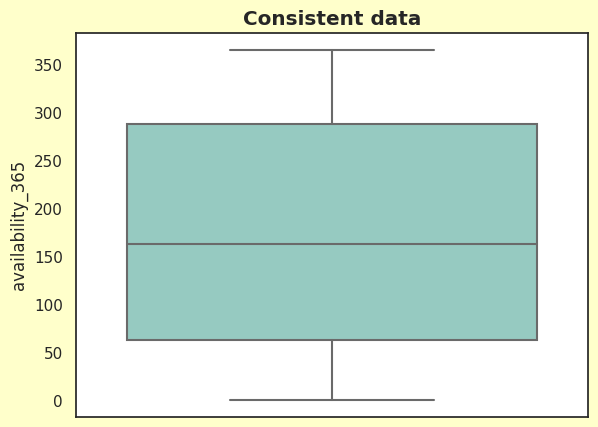

In [36]:
#Matrix without inconsistent data
df_availability = df_airbnb.copy()
cond_1, cond_2 = df_availability.availability_365 > 0, df_availability.availability_365 <= 365
df_availability = df_availability[cond_1 & cond_2]

#Canvas
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 0.8, 0.8])
#Boxplot
ax = sns.boxplot(data=df_availability, y='availability_365', palette='Set3')
ax.set_title('Consistent data', fontdict={'size': 'large', 'weight': 'bold'})

fig.set_facecolor('#FFFFCB')
fig.show()

In [37]:
df_availability.availability_365.describe()

count    63899.000000
mean       173.725019
std        120.426930
min          1.000000
25%         63.000000
50%        163.000000
75%        288.000000
max        365.000000
Name: availability_365, dtype: float64

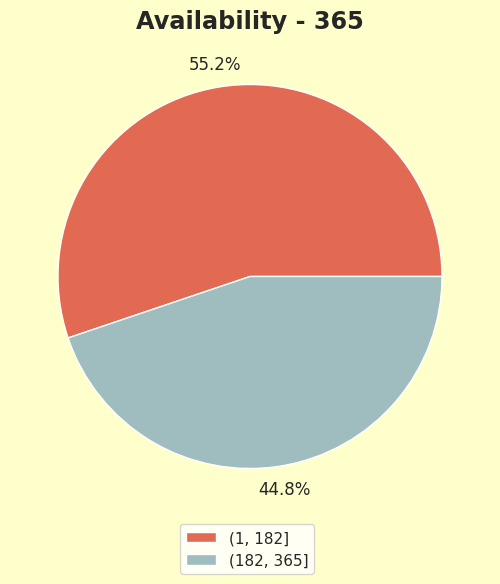

In [38]:
intervals = pd.cut(df_availability.availability_365, [1, 182, 365])
df_availability['intervals'] = intervals
df_intervals_365 = df_availability.groupby('intervals').agg({'availability_365': 'count'})

#Canvas
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1, 1])
#Barplot
ax.pie(data=df_intervals_365, x='availability_365', autopct='%.01f%%', pctdistance=1.12, 
colors=[c_1, c_2])
ax.legend(labels=df_intervals_365.index, bbox_to_anchor=(0.65, 0))
ax.set_title('Availability - 365', fontdict={'size': 'x-large', 'weight': 'bold'})

fig.set_facecolor('#FFFFCB')
fig.show()

In [39]:
df_intervals_365

,availability_365
intervals,
"(1, 182]",34902
"(182, 365]",28343


The most common is that the availability of a property will be less than or equal to 6 months.
Based on:
6 months ≈ 180 days

---

### Price vs Age of the property 💵

In [40]:
#Variables
price = df_airbnb.price
year_built = df_airbnb.year_built
#Calculate covariance
covariance = np.cov(price, year_built)[0, 1]
#Correlation coefficient
coefficient_corr = np.round(covariance / (price.std() * year_built.std()), 4)
coefficient_corr

-0.0037

The correlation coefficient tells us that there is not correlation between both variables, because its value is very close to zero. But, this doesn't have much congruence really, since the older a property is, the lower the price is expected.

In [41]:
price_min = df_airbnb.price.min()
df_airbnb.loc[df_airbnb.price == price_min, ['year_built']].value_counts()[:5]

year_built
2015.0        9
2019.0        7
2017.0        6
2011.0        6
2013.0        5
dtype: int64

In [42]:
price_max = df_airbnb.price.max()
df_airbnb.loc[df_airbnb.price == price_max, ['year_built']].value_counts()[:5]

year_built
2020.0        8
2014.0        7
2011.0        6
2019.0        6
2005.0        5
dtype: int64

You can see that the cheapest price are in properties which have been built recently as well as long ago. And through that information you can check the inconsistency of the data. In adittion, this scenario is repeated with the highest prices.

---

### Prices of properties according to borough 

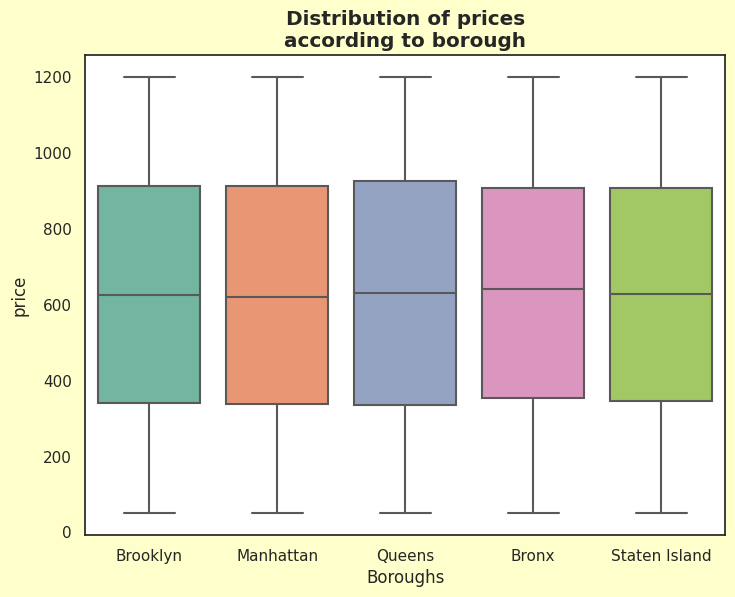

In [43]:
#Canvas
sns.set_theme(style='white')
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1, 1])
#Boxplot
ax = sns.boxplot(data=df_airbnb, x='Boroughs', y='price', palette='Set2')
ax.set_title('Distribution of prices\naccording to borough', fontdict={'size': 'large', 'weight': 'bold'})

fig.set_facecolor('#FFFFCB')
fig.show()

There are no outliers in the distribution of prices in each borough, so the mean is not affected. Therefore, we can use it in order to know which of them is the one with the highest average mean. 

In [44]:
df_price_mean = df_airbnb.groupby('Boroughs').agg({'price': 'mean'}).sort_values('price', ascending=False)
df_price_mean.price = df_price_mean.price.apply(lambda x: np.round(x, 2))

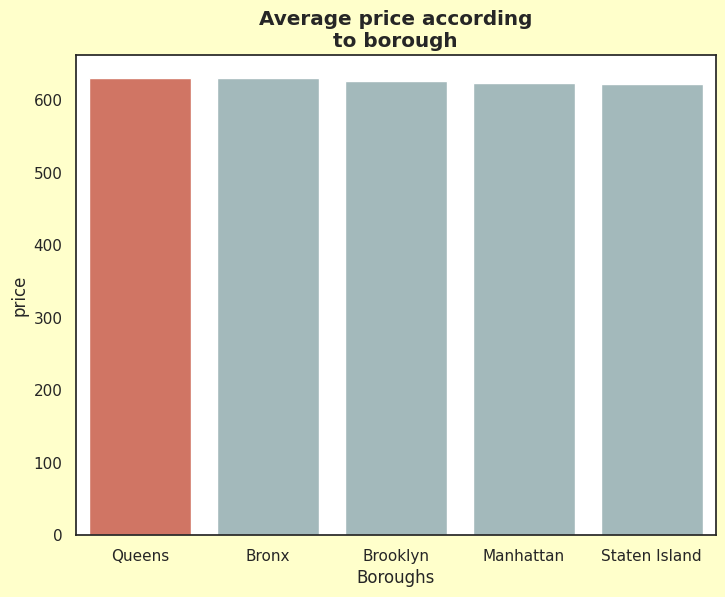

In [45]:
#Palette
my_pltt4 = {x: c_2 for x in df_airbnb.Boroughs.unique()}
my_pltt4['Queens'] = c_1
#Canvas
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1, 1])
#Barplot
ax = sns.barplot(data=df_price_mean, x=df_price_mean.index, y='price', palette=my_pltt4)
ax.set_title('Average price according\nto borough', fontdict={'size': 'large', 'weight': 'bold'})

fig.set_facecolor('#FFFFCB')
fig.show()

In [46]:
df_price_mean

,price
Boroughs,
Queens,630.57
Bronx,630.32
Brooklyn,627.26
Manhattan,623.18
Staten Island,622.23


Queens has with the highest average rental price of the 5 boroughs, even though t can be observed that the difference between this and Bronx is minimal.  

---

### Instant bookable 

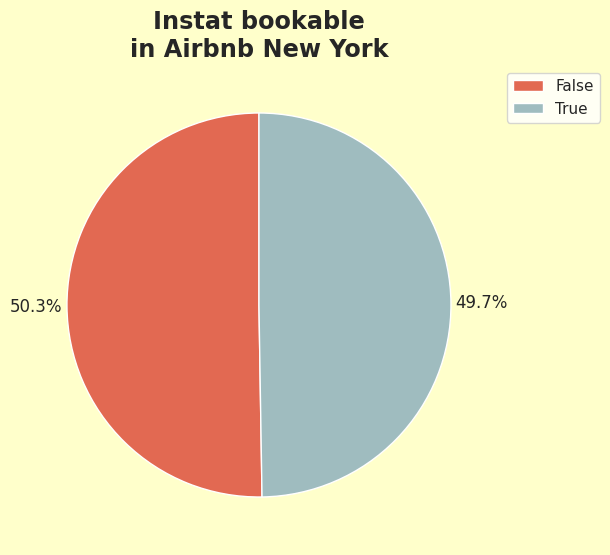

In [47]:
df = pd.DataFrame(df_airbnb.instant_bookable.value_counts())
df.rename(columns={'instant_bookable': 'freq'}, inplace=True)

#Canvas
sns.set_theme(style='white')
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1, 1])
#Countplot
ax.pie(data=df, x='freq', autopct='%.01f%%', pctdistance=1.16, colors=[c_1, c_2], startangle=90)
ax.legend(labels=df.index,bbox_to_anchor=(1, 1))
ax.set_title('Instat bookable\nin Airbnb New York', fontdict={'size': 'x-large', 'weight': 'bold'})

fig.set_facecolor('#FFFFCB')
fig.show()

In [48]:
df

,freq
False,42371
True,41942


Even though the difference is small, this is the information that leaves us:
* 50.3% of the properties don't allow instant booking, while 49.8% do.

---

### The most common cancellation❌

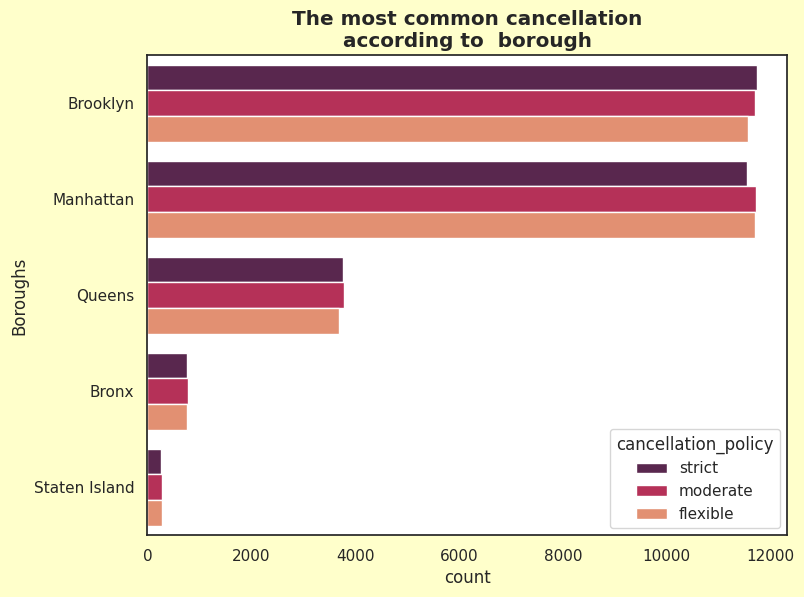

In [49]:
#Canvas
sns.set_theme(style='white')
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1, 1])
#Barplot
ax = sns.countplot(data=df_airbnb, y='Boroughs', hue='cancellation_policy', palette='rocket', orient='h')
ax.set_title('The most common cancellation\naccording to  borough',fontdict={'size': 'large', 'weight': 'bold'})
fig.set_facecolor('#FFFFCB')
fig.show()

In [50]:
df_cancel = df_airbnb.pivot_table(index='Boroughs', columns='cancellation_policy', aggfunc={'cancellation_policy':'count'})
df_cancel.columns = ['flexible', 'moderate', 'strict']
df_cancel

,flexible,moderate,strict
Boroughs,,,
Bronx,766,773,761
Brooklyn,11562,11698,11734
Manhattan,11694,11719,11537
Queens,3689,3783,3768
Staten Island,276,284,269


Insights:
The most common cancellation policy in...
* Brooklyn is strict. 
* Manhattan is moderate.
* Queen is moderate.
* Bronx is moderate.
* Staten Island is moderate.

So you can see that moderate cancellation policy is the most common in the boroughs of New York.  

---

### Rules 📏

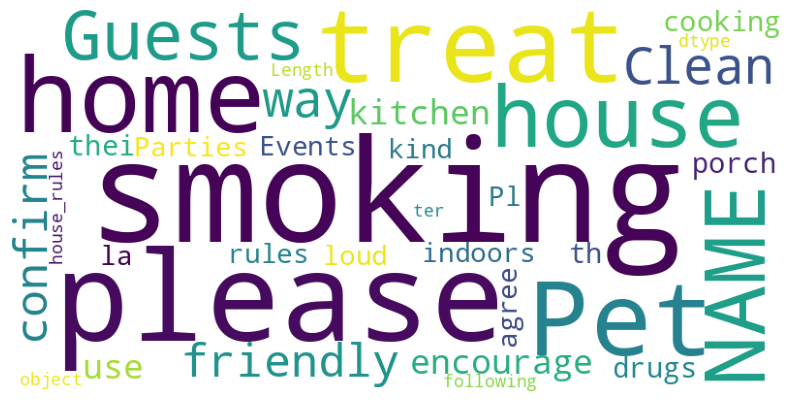

In [56]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=400).generate(str(house_rules))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [52]:
#Rule: No smoking
smoking = house_rules[house_rules.str.contains('smoking')].shape[0]
variable_1 = house_rules[house_rules.str.contains('no smoking')].shape[0]
variable_2 = house_rules[house_rules.str.contains('No smoking')].shape[0]
variable_3 = house_rules[house_rules.str.contains('NO smoking')].shape[0]
variable_4 = house_rules[house_rules.str.contains('NO SMOKING')].shape[0]
no_smoking = variable_1 + variable_2 + variable_3 + variable_4
pct = np.round((no_smoking / smoking)*100, 2)
print("""
In the column rules, {}% of values containing the word 'smoking' indicate that smoking is not
allowed inside property.
""".format(pct))


In the column rules, 90.14% of values containing the word 'smoking' indicate that smoking is not
allowed inside property.



In [53]:
#Rule: Pets
def no_pets(rules):
    key_words = ['No Pets', 'NO Pets']
    freq = 0
    for word in key_words:
        freq += rules[rules.str.contains(word)].shape[0]
    return freq

def allow_pets(rules):
    key_words = ['Pets Allowed', 'Pets are allowed', 'Pet Friendly', 'Pets allowed']
    freq = 0
    for word in key_words:
        freq += rules[rules.str.contains(word)].shape[0]
    return freq

no_pets = no_pets(house_rules)
allow_pets = allow_pets(house_rules) 
df_pets = pd.DataFrame({
    'No pets': no_pets,
    'Allow pets': allow_pets
}, index=['freq'])
df_pets = df_pets.T
df_pets

,freq
No pets,2287
Allow pets,690


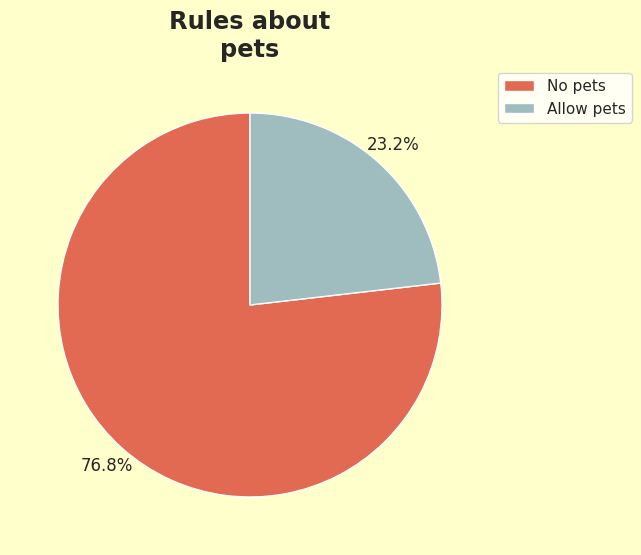

In [54]:
#Canvas
sns.set_theme(style='white')
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1, 1])
#Pie chart
ax.pie(data=df_pets, x='freq', colors=[c_1, c_2], autopct='%.01f%%', pctdistance = 1.12, startangle=90)
ax.legend(labels=df_pets.index, bbox_to_anchor=(1, 1))
ax.set_title('Rules about\npets', fontdict={'size': 'x-large', 'weight': 'bold'})

fig.set_facecolor('#FFFFCB')
fig.show()

In [55]:
pets = house_rules[house_rules.str.contains('Pet')].shape[0]
pct = np.round(((no_pets + allow_pets) / pets)*100, 2)
print("""
It has only been collected {}% of values that contain the word 'Pet'.
Result:
* The most common is that the pets are not allowed.
""".format(pct))


It has only been collected 72.7% of values that contain the word 'Pet'.
Result:
* The most common is that the pets are not allowed.



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f448db2f-0e89-4e53-b3bc-f75c040517d5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>